# Importing all the neccesary modules

In [230]:
#Importing The Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import RobustScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense
import tensorflow 
from collections import defaultdict
import pickle

# Reading the datasets

In [286]:
f=pd.read_csv('train.csv')
v=pd.read_csv('test.csv')



In [232]:
f1=f[['CryoSleep']]
f1.head

<bound method NDFrame.head of      CryoSleep
0         True
1        False
2        False
3         True
4        False
...        ...
4341     False
4342      True
4343      True
4344     False
4345      True

[4346 rows x 1 columns]>

# Plotting the graphs and correlation matrix for finding the relation amongst the variables

In [233]:
f2 = f1.replace(np.nan, 'Others', regex=True)
f2

,CryoSleep
0,True
1,False
2,False
3,True
4,False
...,...
4341,False
4342,True
4343,True
4344,False


In [312]:
f2.value_counts()

CryoSleep
False        2719
True         1521
Others        106
dtype: int64

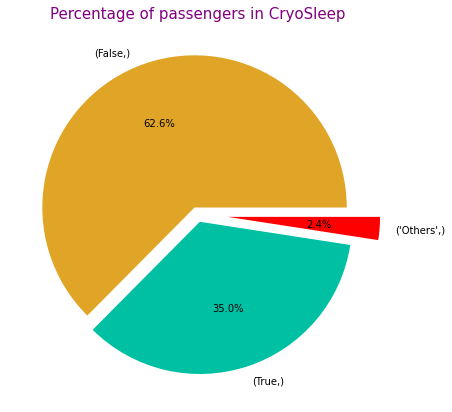

In [235]:
f2.dropna(inplace = True)
labels = f2.value_counts().index
colors = ['#E0A526','#00C0A3','red']
explode = [0.05,0.05,0.2]
sizes = f2.value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of passengers in CryoSleep',color = 'Purple',fontsize = 15);

In [236]:
f3=f[['Destination']]
f4 = f3.replace(np.nan, 'Others', regex=True)
f4.head

<bound method NDFrame.head of       Destination
0     TRAPPIST-1e
1     TRAPPIST-1e
2     55 Cancri e
3     TRAPPIST-1e
4     TRAPPIST-1e
...           ...
4341  TRAPPIST-1e
4342  55 Cancri e
4343  TRAPPIST-1e
4344  TRAPPIST-1e
4345  TRAPPIST-1e

[4346 rows x 1 columns]>

In [237]:
f4.value_counts()

Destination  
TRAPPIST-1e      2980
55 Cancri e       895
PSO J318.5-22     384
Others             87
dtype: int64

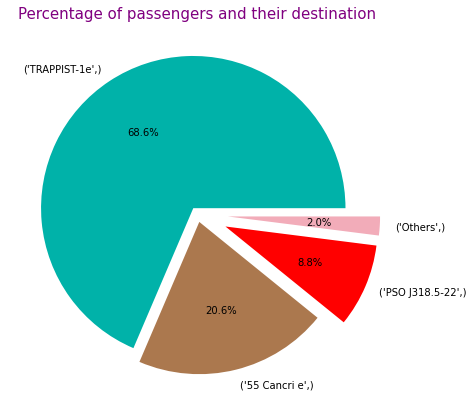

In [238]:
f4.dropna(inplace = True)
labels = f4.value_counts().index
colors = ['#00B2A9','#Ab784E','red','#F2ACB9']
explode = [0.05,0.05,0.2,0.2]
sizes = f4.value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of passengers and their destination',color = 'Purple',fontsize = 15);

In [239]:
f5=f[['VIP']]
f6 = f5.replace(np.nan, 'Others', regex=True)
f6.head

<bound method NDFrame.head of         VIP
0     False
1     False
2     False
3     False
4     False
...     ...
4341  False
4342  False
4343  False
4344  False
4345  False

[4346 rows x 1 columns]>

In [240]:
f6.value_counts()

VIP   
False     4136
Others     109
True       101
dtype: int64

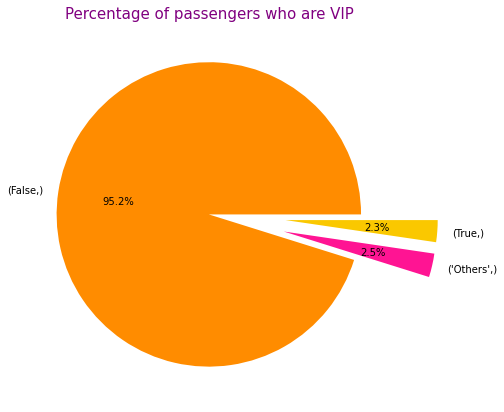

In [241]:
f6.dropna(inplace = True)
labels = f6.value_counts().index
colors = ['#FF8C00','#FF1493','#FAC800']
explode = [0.005,0.5,0.5]
sizes = f6.value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of passengers who are VIP',color = 'Purple',fontsize = 15);

In [242]:
f.drop(columns=["PassengerId"] , inplace = True)
v.drop(["PassengerId"] , axis = 1 , inplace = True)
TARGET = 'Transported'
FEATURES = [col for col in f.columns if col != TARGET]
RANDOM_STATE = 12 


In [243]:
features = [i for i in f.columns if f[i].dtypes != 'O' and i != TARGET]
features


['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

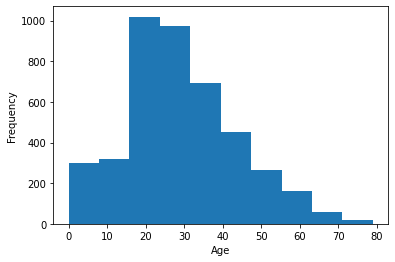

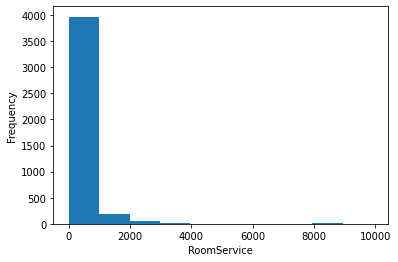

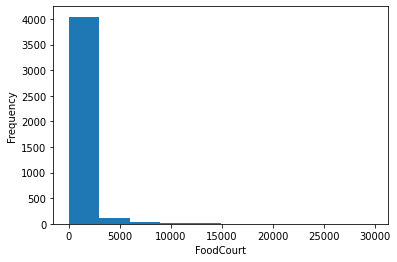

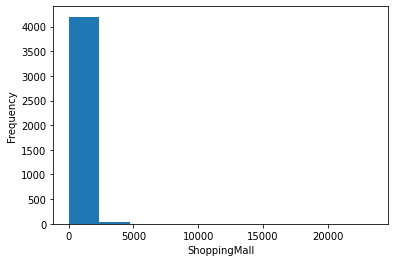

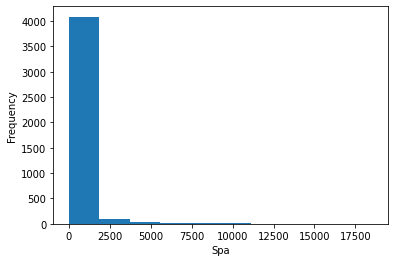

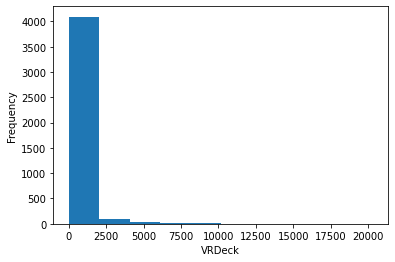

In [244]:
for i in features:
    f[i].plot.hist(bins = 10)
    plt.xlabel(i)
    plt.show()

In [245]:
f.corr()


C:\Users\savita\AppData\Local\Temp\ipykernel_28408\893301458.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.075110,0.126308,0.028711,0.110651,0.100848,-0.083984
RoomService,0.075110,1.000000,-0.014347,0.063378,0.013033,-0.022018,-0.239243
FoodCourt,0.126308,-0.014347,1.000000,-0.018694,0.218407,0.270673,0.044611
ShoppingMall,0.028711,0.063378,-0.018694,1.000000,-0.013633,-0.017728,0.002600
Spa,0.110651,0.013033,0.218407,-0.013633,1.000000,0.180331,-0.221563
VRDeck,0.100848,-0.022018,0.270673,-0.017728,0.180331,1.000000,-0.205314
Transported,-0.083984,-0.239243,0.044611,0.002600,-0.221563,-0.205314,1.000000


In [246]:
f.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Earth,True,G/593/S,TRAPPIST-1e,4.0,False,0.0,0.0,0.0,0.0,0.0,Kelle Daughttley,True
1,Mars,False,NaN,TRAPPIST-1e,19.0,False,781.0,0.0,295.0,613.0,0.0,Forms Bart,False
2,Mars,False,D/222/P,55 Cancri e,19.0,False,1043.0,0.0,138.0,0.0,0.0,Range Bara,False
3,Mars,True,F/1225/S,TRAPPIST-1e,51.0,False,0.0,0.0,0.0,0.0,0.0,Eang Potie,True
4,Mars,False,F/317/S,TRAPPIST-1e,31.0,False,2436.0,0.0,147.0,16.0,0.0,Flams Spane,False


In [247]:
f.shape


(4346, 13)

C:\Users\savita\AppData\Local\Temp\ipykernel_28408\3221023225.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot:>

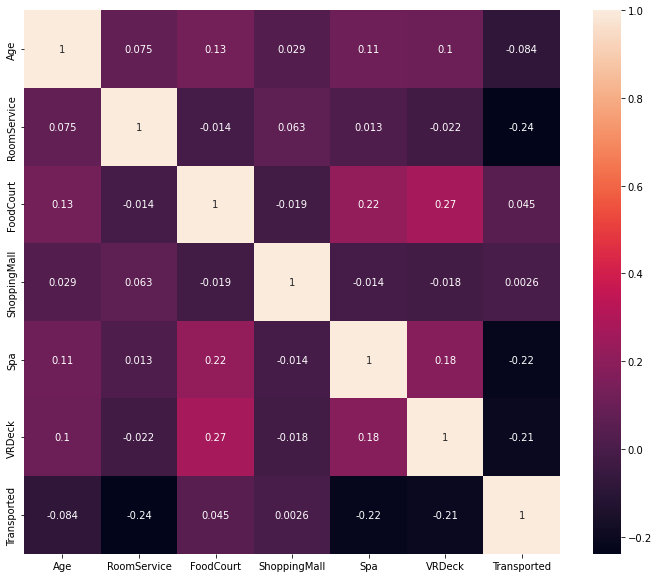

In [248]:
plt.figure(figsize=(12,10))
sns.heatmap(f.corr(), annot = True)

# Analyzing the Data

In [249]:
f.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4258 non-null   object 
 1   CryoSleep     4240 non-null   object 
 2   Cabin         4245 non-null   object 
 3   Destination   4259 non-null   object 
 4   Age           4260 non-null   float64
 5   VIP           4237 non-null   object 
 6   RoomService   4251 non-null   float64
 7   FoodCourt     4242 non-null   float64
 8   ShoppingMall  4235 non-null   float64
 9   Spa           4265 non-null   float64
 10  VRDeck        4250 non-null   float64
 11  Name          4240 non-null   object 
 12  Transported   4346 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 411.8+ KB


In [250]:
f.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4260.000000,4251.000000,4242.000000,4235.000000,4265.000000,4250.000000
mean,29.120892,219.024935,461.453088,166.309799,304.600469,306.028235
std,14.717810,657.604181,1633.724489,605.276409,1105.054729,1136.220903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,46.000000,68.750000,25.000000,63.000000,48.750000
max,79.000000,9920.000000,29813.000000,23492.000000,18572.000000,20336.000000


In [251]:
f.columns


Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported'],
      dtype='object')

In [252]:
f['Transported'].value_counts()


True     2189
False    2157
Name: Transported, dtype: int64

In [253]:
f.isnull().sum()


HomePlanet       88
CryoSleep       106
Cabin           101
Destination      87
Age              86
VIP             109
RoomService      95
FoodCourt       104
ShoppingMall    111
Spa              81
VRDeck           96
Name            106
Transported       0
dtype: int64

# Finding the null values

In [254]:
v_null = pd.DataFrame(v.isna().sum())
v_null = v_null.sort_values(by = 0 ,ascending = False)
f_null = pd.DataFrame(f.isna().sum())
f_null = f_null.sort_values(by = 0 ,ascending = False)[:-1]


fig = make_subplots(rows=1, 
                    cols=2,
                    column_titles = ["Train Data", "Test Data"] ,
                   )
fig.add_trace(go.Bar(x=f_null[0],
                     y=f_null.index,
                     orientation="h",
                    marker=dict(color=[n for n in range(12)], 
                                line_color='rgb(0,0,0)' , 
                                line_width = 2,
                                coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=v_null[0], 
                     y=v_null.index,
                     orientation="h",
                    marker=dict(color=[n for n in range(12)], 
                                line_color='rgb(0,0,0)', 
                                line_width = 2,
                                coloraxis="coloraxis")),
              1, 2)

fig.update_layout(showlegend=False, title_text="Null Value Distribution", title_x=0.5)

In [255]:
target_train = pd.DataFrame(f[TARGET].value_counts()).reset_index()
target_train.columns = [TARGET, 'count']

print("\033[94mPercentage of Transported = 0: {:.2f} %".format(target_train["count"][0] *100 / f.shape[0]))
print("\033[94mPercentage of Transported = 1: {:.2f} %".format(target_train["count"][1]* 100 / f.shape[0]))


Percentage of Transported = 0: 50.37 %
Percentage of Transported = 1: 49.63 %


In [256]:
f.Cabin.describe()


count         4245
unique        3614
top       F/1194/P
freq             6
Name: Cabin, dtype: object

In [257]:
f.Cabin.value_counts()


F/1194/P    6
G/734/S     5
G/974/P     5
G/186/S     5
C/82/P      5
           ..
B/45/P      1
B/292/P     1
B/89/S      1
F/1746/S    1
F/1736/S    1
Name: Cabin, Length: 3614, dtype: int64

# Dropping somee columns and replacing values 

In [258]:
f.drop(['Cabin','Name'], axis = 1, inplace = True)


In [259]:
st.mode(f['CryoSleep'])[0][0]


False

In [260]:
f.CryoSleep.fillna(st.mode(f['CryoSleep'])[0][0], inplace = True)
f.VIP.fillna(st.mode(f['VIP'])[0][0], inplace = True)

In [261]:
f["Transported"] = f["Transported"].astype(int)
f["CryoSleep"] = f["CryoSleep"].astype(int)
f["VIP"] = f["VIP"].astype(int)

In [262]:
f.HomePlanet.replace(['Europa','Earth','Mars'],[0,1,2], inplace = True)
f.Destination.replace(['TRAPPIST-1e','PSO J318.5-22','55 Cancri e'],[0,1,2], inplace = True)


# Using imputer for filling for the missing or null values

In [263]:
imputer = KNNImputer(n_neighbors=3)
main_train = imputer.fit_transform(f)

In [264]:
main_train.shape


(4346, 11)

In [265]:
f = pd.DataFrame(main_train, columns =['HomePlanet', 'CryoSleep', 'Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported'], dtype = 'int64') 
f.head()

C:\Users\savita\AppData\Local\Temp\ipykernel_28408\6452280.py:1: FutureWarning:

In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)



,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,1,0,4,0,0,0,0,0,0,1
1,2,0,0,19,0,781,0,295,613,0,0
2,2,0,2,19,0,1043,0,138,0,0,0
3,2,1,0,51,0,0,0,0,0,0,1
4,2,0,0,31,0,2436,0,147,16,0,0


In [266]:
f.isnull().sum()


HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [267]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]

imputer = SimpleImputer(strategy='median' )
main_f=imputer.fit(f[imputer_cols])
f[imputer_cols] = imputer.transform(f[imputer_cols])
v[imputer_cols] = imputer.transform(v[imputer_cols])
f["HomePlanet"].fillna('Z', inplace=True)
v["HomePlanet"].fillna('Z', inplace=True)

In [268]:
f.shape


(4346, 11)

# Train Test split

In [269]:
X = f.iloc[:,:-1]
y = f.iloc[:,-1]

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)


# Scaling the Data

In [271]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [272]:
logr = LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
# accuracy score
accuracy_score(y_test,y_pred)

0.8206896551724138

# XGBoost Classifier

In [273]:
xgb1 = xgb.XGBClassifier()
xgb1.fit(X_train, y_train)
y_pred = xgb1.predict(X_test)
# view accuracy score
accuracy_score(y_test, y_pred)

0.8

# SVM Classifier

In [274]:
cl= SVC()
cl.fit(X_train, y_train)
y_pred = cl.predict(X_test)
# view accuracy score
accuracy_score(y_test, y_pred)

0.8206896551724138

# Decision Tree Classifier

In [275]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
# view accuracy score
accuracy_score(y_test, y_pred)

0.7494252873563219

# Random Forest Classifier

In [276]:
random = RandomForestClassifier()
random.fit(X_train, y_train)
y_pred = random.predict(X_test)
# view accuracy score
accuracy_score(y_test, y_pred)

0.8045977011494253

# Neural Networks

In [277]:
model = tensorflow.keras.Sequential()
model.add(Dense(16, activation='relu', input_shape=(10,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer='adam',
metrics=['accuracy'])
model.fit(X_train, y_train,epochs=40, batch_size=1, verbose=1)

Epoch 1/40
3911/3911 [==============================] - 7s 2ms/step - loss: 0.6719 - accuracy: 0.5589
Epoch 2/40
3911/3911 [==============================] - 6s 2ms/step - loss: 0.6131 - accuracy: 0.7699
Epoch 3/40
3911/3911 [==============================] - 6s 2ms/step - loss: 0.5697 - accuracy: 0.7773
Epoch 4/40
3911/3911 [==============================] - 6s 2ms/step - loss: 0.5378 - accuracy: 0.7806
Epoch 5/40
3911/3911 [==============================] - 6s 2ms/step - loss: 0.5164 - accuracy: 0.7893
Epoch 6/40
3911/3911 [==============================] - 6s 2ms/step - loss: 0.5065 - accuracy: 0.7891
Epoch 7/40
3911/3911 [==============================] - 6s 2ms/step - loss: 0.4987 - accuracy: 0.7944
Epoch 8/40
3911/3911 [==============================] - 6s 2ms/step - loss: 0.4929 - accuracy: 0.7926
Epoch 9/40
3911/3911 [==============================] - 6s 2ms/step - loss: 0.4888 - accuracy: 0.7911
Epoch 10/40
3911/3911 [==============================] - 6s 2ms/step - loss: 0.485

In [184]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

14/14 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.8000
[0.46788910031318665, 0.800000011920929]


# Working on the Test File

In [287]:
test = pd.DataFrame()
test = v.iloc[:,0]

# Replacing columns and dropping the unnecessary ones

In [288]:
v.drop(['PassengerId','Cabin','Name'], axis = 1, inplace = True)


In [289]:
v.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

In [290]:
v.CryoSleep.fillna(st.mode(v['CryoSleep'])[0][0], inplace = True)
v.VIP.fillna(st.mode(v['VIP'])[0][0], inplace = True)


In [291]:
v["CryoSleep"] = v["CryoSleep"].astype(int)
v["VIP"] = v["VIP"].astype(int)
v.HomePlanet.replace(['Europa','Earth','Mars'],[0,1,2], inplace = True)
v.Destination.replace(['TRAPPIST-1e','PSO J318.5-22','55 Cancri e'],[0,1,2], inplace = True)

In [292]:
v.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1.0,1,1.0,23.0,0,0.0,0.0,0.0,0.0,0.0
1,1.0,0,0.0,36.0,0,3.0,0.0,435.0,8.0,277.0
2,0.0,0,2.0,27.0,0,0.0,0.0,0.0,0.0,0.0
3,1.0,0,0.0,35.0,0,1.0,0.0,0.0,0.0,803.0
4,0.0,1,2.0,33.0,0,0.0,0.0,0.0,0.0,0.0


# Imputing the test datset

In [294]:
imputer = KNNImputer(n_neighbors=3)
main_test = imputer.fit_transform(v)
#v["HomePlanet"].fillna('Z', inplace=True)
v = pd.DataFrame(main_test, columns =['HomePlanet', 'CryoSleep', 'Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'], dtype = 'int64') 
v.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,1,23,0,0,0,0,0,0
1,1,0,0,36,0,3,0,435,8,277
2,0,0,2,27,0,0,0,0,0,0
3,1,0,0,35,0,1,0,0,0,803
4,0,1,2,33,0,0,0,0,0,0


# Scaling the data

In [295]:
X_test = v.iloc[:,:]
X_test = scaler.transform(X_test)


# Predicting the result

In [296]:
y_test = model.predict(X_test)


136/136 [==============================] - 0s 2ms/step


In [297]:
len(y_test)


4347

In [298]:
y_pred = logr.predict(X_test)


In [299]:
y_pred


array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

# Appending True or False value to the binary values

In [300]:
dic = defaultdict(list)
for i in range(len(y_pred)):
    dic['PassengerId'].append(test[i])
    if y_pred[i] == 1:
        dic['Transported'].append('True')
    else:
        dic['Transported'].append('False')

# Saving the results

In [301]:
main_test = pd.DataFrame(dic)
main_test.to_csv('./Result.csv', index = False)

In [314]:
f9=pd.read_csv('Result.csv')
f9.head()


,PassengerId,Transported
0,3758_02,True
1,2291_02,False
2,7052_01,True
3,8976_01,False
4,8456_01,True


In [316]:
f10=f9['Transported']
f10.value_counts()

True     2248
False    2099
Name: Transported, dtype: int64

# Graph of passengers transported

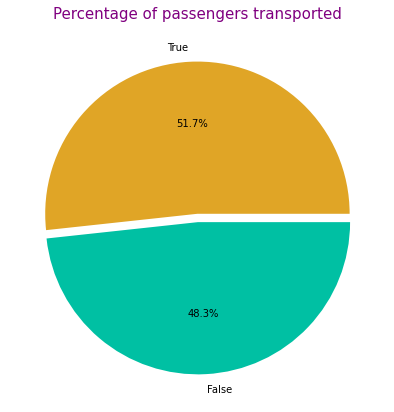

In [320]:
labels = f10.value_counts().index
colors = ['#E0A526','#00C0A3']
explode = [0.005,0.05]
sizes = f10.value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of passengers transported',color = 'Purple',fontsize = 15);

# Saving the model

In [321]:
model.save("C:/Users/savita/Desktop/2/archive (2)/model.h5")

In [322]:
pickle.dump("C:/Users/savita/Desktop/2/archive (2)/", open('model.pkl', 'wb'))